In [1]:
from LegoRL import *

In [2]:
env = gym.make('CartPole-v0').unwrapped

In [3]:
CartpoleNN = lambda: nn.Sequential(
                nn.Linear(4, 20),
                nn.ELU(),
                nn.Linear(20, 20),
                nn.ELU()
)

# DQN (without Target network)

In [4]:
agent = Composed(
    visualizer = Visualizer(),
    runner     = Runner(policy="policy"),
    replay     = ReplayBuffer(runner="runner"),
    sampler    = Sampler(replay="replay"),
    backbone   = Backbone(CartpoleNN()),
    q_head     = Q_head(backbone="backbone"),
    dqn_loss   = DQN_loss(sampler="sampler", q_head="q_head"),
    trainer    = Trainer(backbone="backbone", losses=["dqn_loss"]),
    policy     = eGreedy(greedy_policy="q_head"),
)

In [5]:
system = System(agent, env)

Adding new head q_head to backbone:
  Input shape is (4,)
  Backbone feature size is 20
  Desired output is 2


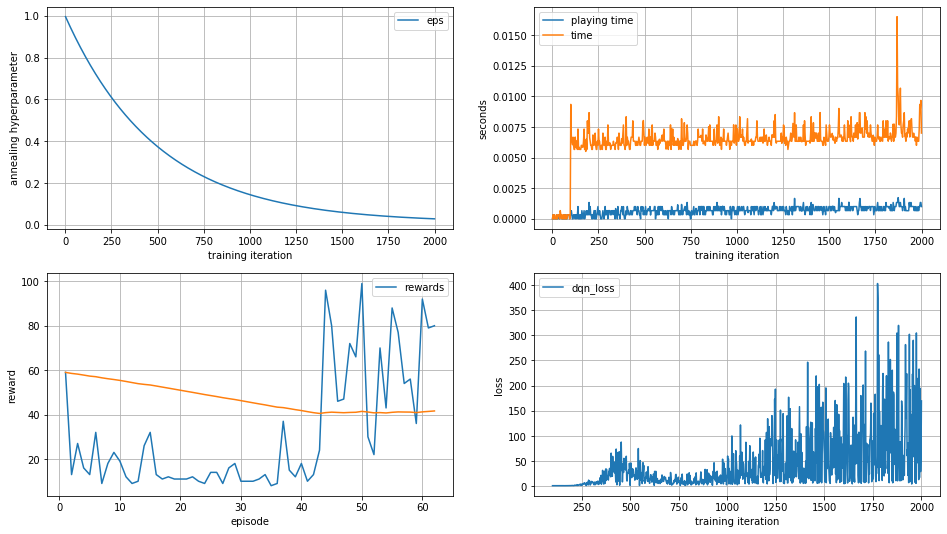

In [6]:
system.run(2000)

# DQN
##### <u>CHANGES</u>:
* added **Frozen(Q_head)** module, which stores a copy of **Q_head** and updates it each 100 (default *timer* time) iterations.
* DQN_loss now has *critic* parameter which references **Frozen(q_head)**.

In [7]:
agent = Composed(
    visualizer = Visualizer(),
    runner     = Runner(policy="policy"),
    replay     = ReplayBuffer(runner="runner"),
    sampler    = Sampler(replay="replay"),
    backbone   = Backbone(CartpoleNN()),
    q_head     = Q_head(backbone="backbone"),
    dqn_loss   = DQN_loss(sampler="sampler", q_head="q_head", critic="target"),
    target     = Frozen(Q_head)(source="q_head"),
    trainer    = Trainer(backbone="backbone", losses=["dqn_loss"]),
    policy     = eGreedy(greedy_policy="q_head"),
)

In [8]:
system = System(agent, env)

Adding new head q_head to backbone:
  Input shape is (4,)
  Backbone feature size is 20
  Desired output is 2


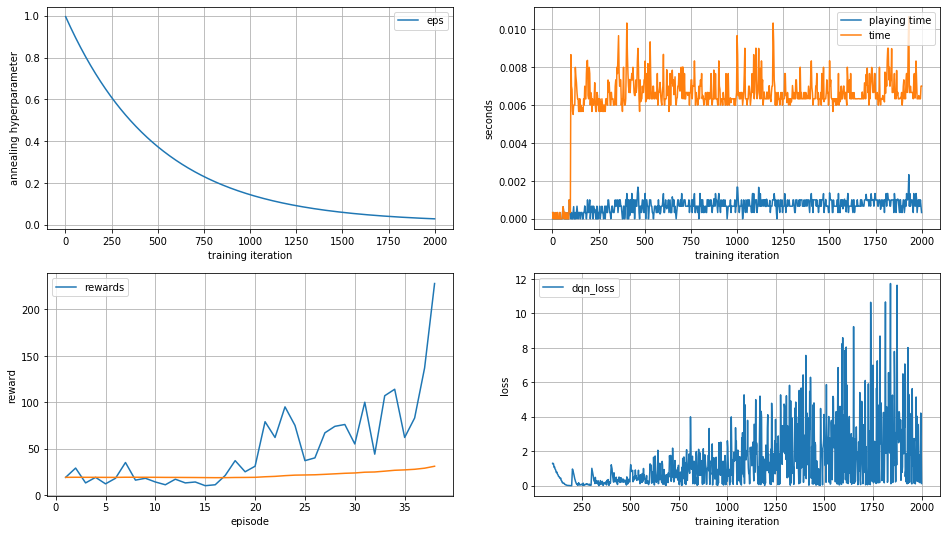

In [9]:
system.run(2000)

# Double DQN
##### <u>CHANGES</u>:
* DQN_loss is changed to **DoubleDQN_loss** (which is just a subclass of DQN_loss).

In [10]:
agent = Composed(
    visualizer = Visualizer(),
    runner     = Runner(policy="policy"),
    replay     = ReplayBuffer(runner="runner"),
    sampler    = Sampler(replay="replay"),
    backbone   = Backbone(CartpoleNN()),
    q_head     = Q_head(backbone="backbone"),
    dqn_loss   = DoubleDQN_loss(sampler="sampler", q_head="q_head", critic="target"),
    target     = Frozen(Q_head)(source="q_head"),
    trainer    = Trainer(backbone="backbone", losses=["dqn_loss"]),
    policy     = eGreedy(greedy_policy="q_head"),
)

In [11]:
system = System(agent, env)

Adding new head q_head to backbone:
  Input shape is (4,)
  Backbone feature size is 20
  Desired output is 2


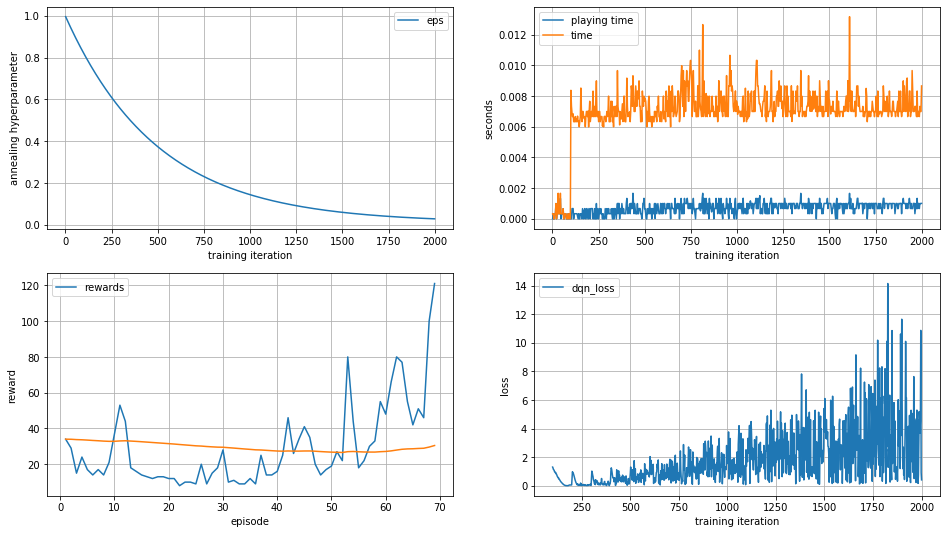

In [12]:
system.run(2000)

# Dueling Double DQN
##### <u>CHANGES</u>:
* Q_head is given as parameter *representation* **DuelingQ** head.

In [13]:
agent = Composed(
    visualizer = Visualizer(),
    runner     = Runner(policy="policy"),
    replay     = ReplayBuffer(runner="runner"),
    sampler    = Sampler(replay="replay"),
    backbone   = Backbone(CartpoleNN()),
    q_head     = Q_head(backbone="backbone", representation=DuelingQ),
    dqn_loss   = DoubleDQN_loss(sampler="sampler", q_head="q_head", critic="target"),
    target     = Frozen(Q_head)(source="q_head"),
    trainer    = Trainer(backbone="backbone", losses=["dqn_loss"]),
    policy     = eGreedy(greedy_policy="q_head"),
)

In [14]:
system = System(agent, env)

Adding new head q_head to backbone:
  Input shape is (4,)
  Backbone feature size is 20
  Desired output is 3


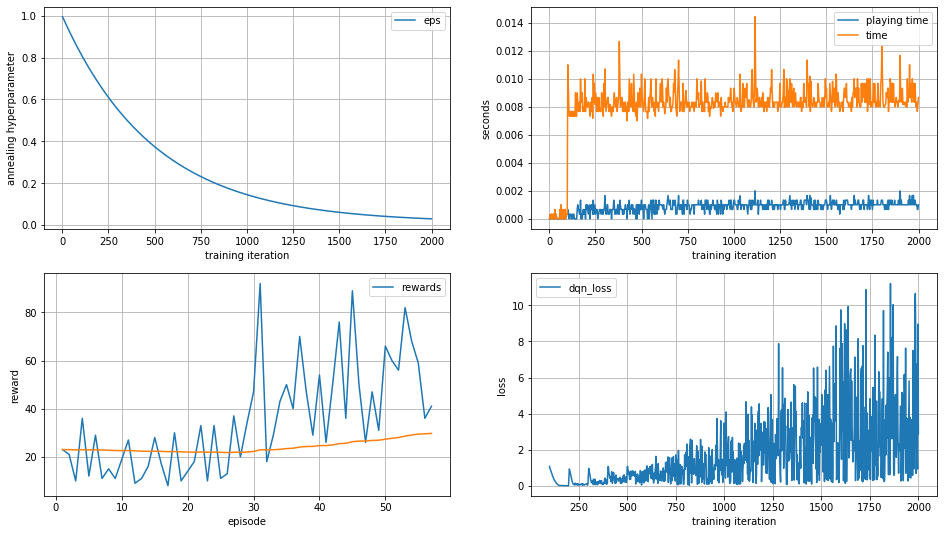

In [15]:
system.run(2000)

# Dueling Double DQN with PrioritizedReplay
##### <u>CHANGES</u>:
* Sampler is changed to **PrioritizedSampler** which will store priorities for replay buffer and sample using them
* added **SamplerBiasCorrection** which mixes weights in batches sampled by PrioritizedSampler to correct bias
* added **PrioritiesUpdater** which will update priorities of PrioritizedSampler from its own batches using DQN_loss
* DQN_loss now uses **SamplerBiasCorrection** as *sampler*

In [16]:
agent = Composed(
    visualizer = Visualizer(),
    runner     = Runner(policy="policy"),
    replay     = ReplayBuffer(runner="runner"),
    sampler    = PrioritizedSampler(replay="replay"),
    corrected  = SamplerBiasCorrection(sampler="sampler"),
    updater    = PrioritiesUpdater(sampler="sampler", priority_provider="dqn_loss"),
    backbone   = Backbone(CartpoleNN()),
    q_head     = Q_head(backbone="backbone", representation=DuelingQ),
    dqn_loss   = DQN_loss(sampler="corrected", q_head="q_head", critic="target"),
    target     = Frozen(Q_head)(source="q_head"),
    trainer    = Trainer(backbone="backbone", losses=["dqn_loss"]),
    policy     = eGreedy(greedy_policy="q_head"),
)

In [17]:
system = System(agent, env)

Adding new head q_head to backbone:
  Input shape is (4,)
  Backbone feature size is 20
  Desired output is 3


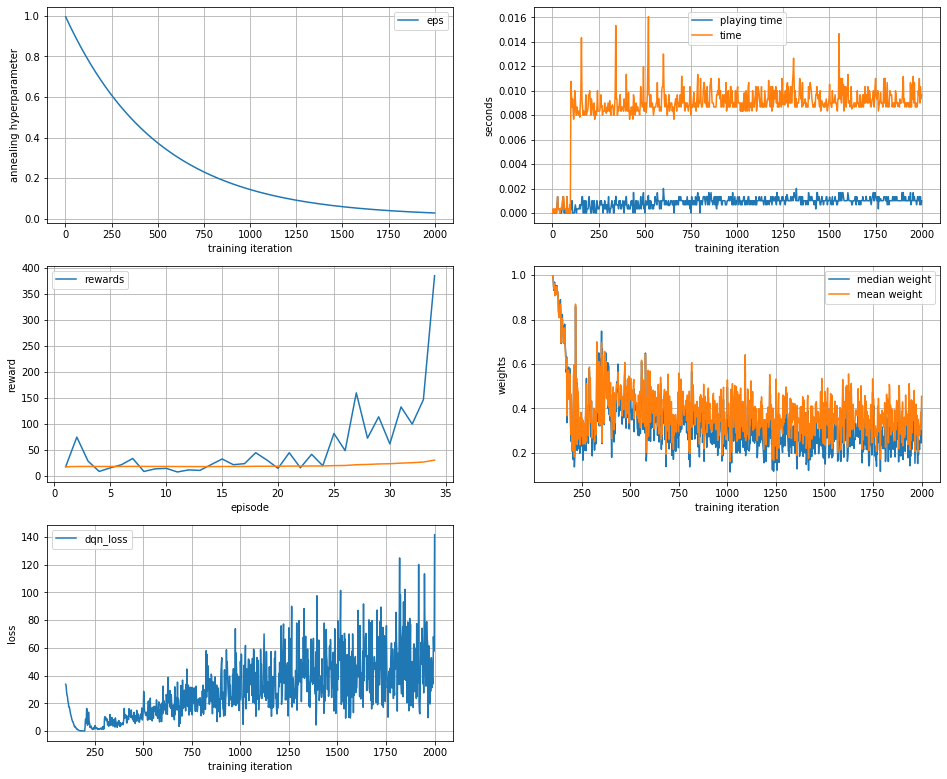

In [18]:
system.run(2000)

# N-step Dueling Double DQN with PrioritizedReplay
##### <u>CHANGES</u>:
* **NstepLatency** added, reading stream from Runner and changing all transitions to N-step.
* replay's parameter *runner* is changed to NstepLatency.

In [19]:
agent = Composed(
    visualizer = Visualizer(),
    runner     = Runner(policy="policy"),
    latency    = NstepLatency(runner="runner"),
    replay     = ReplayBuffer(runner="latency"),
    sampler    = PrioritizedSampler(replay="replay"),
    corrected  = SamplerBiasCorrection(sampler="sampler"),
    updater    = PrioritiesUpdater(sampler="sampler", priority_provider="dqn_loss"),
    backbone   = Backbone(CartpoleNN()),
    q_head     = Q_head(backbone="backbone", representation=DuelingQ),
    dqn_loss   = DQN_loss(sampler="corrected", q_head="q_head", critic="target"),
    target     = Frozen(Q_head)(source="q_head"),
    trainer    = Trainer(backbone="backbone", losses=["dqn_loss"]),
    policy     = eGreedy(greedy_policy="q_head"),
)

In [20]:
system = System(agent, env)

Adding new head q_head to backbone:
  Input shape is (4,)
  Backbone feature size is 20
  Desired output is 3


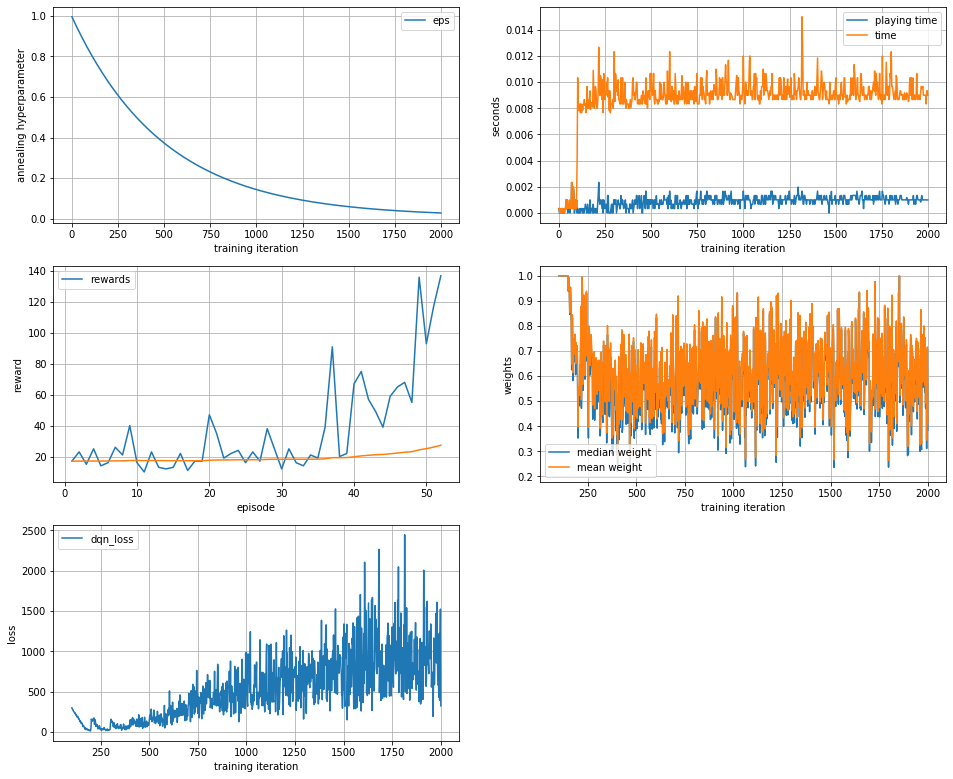

In [21]:
system.run(2000)

# Noisy N-step Dueling Double DQN with PrioritizedReplay
##### <u>CHANGES</u>:
* **NoisyLinear** is used instead of linear layer
* qHead's parameter *headNetwork* is also **NoisyLinear**.

In [22]:
NoisyCartpoleNN = lambda: nn.Sequential(
                NoisyLinear()(4, 20),
                nn.ELU(),
                NoisyLinear()(20, 20),
                nn.ELU()
)

In [23]:
agent = Composed(
    visualizer = Visualizer(),
    runner     = Runner(policy="policy"),
    latency    = NstepLatency(runner="runner"),
    replay     = ReplayBuffer(runner="latency"),
    sampler    = PrioritizedSampler(replay="replay"),
    corrected  = SamplerBiasCorrection(sampler="sampler"),
    updater    = PrioritiesUpdater(sampler="sampler", priority_provider="dqn_loss"),
    backbone   = Backbone(NoisyCartpoleNN()),
    q_head     = Q_head(backbone="backbone", headNetwork=NoisyLinear(), representation=DuelingQ),
    dqn_loss   = DQN_loss(sampler="corrected", q_head="q_head", critic="target"),
    target     = Frozen(Q_head)(source="q_head"),
    trainer    = Trainer(backbone="backbone", losses=["dqn_loss"]),
    policy     = eGreedy(greedy_policy="q_head"),
)

In [24]:
system = System(agent, env)

Adding new head q_head to backbone:
  Input shape is (4,)
  Backbone feature size is 20
  Desired output is 3


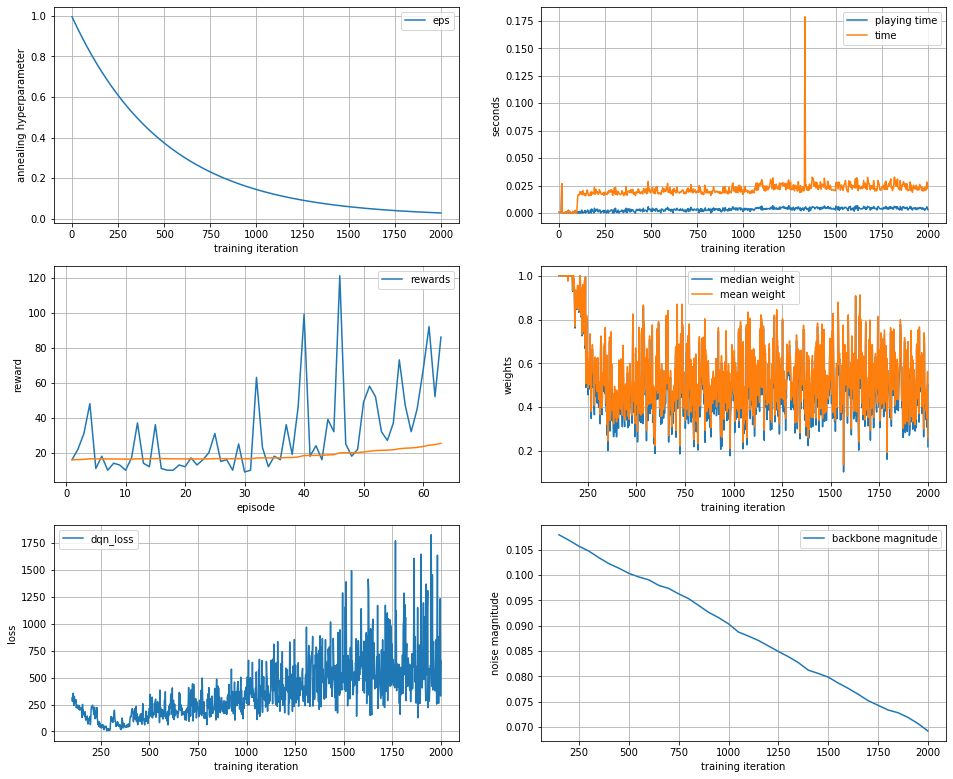

In [25]:
system.run(2000)

# Categorical DQN (also known as c51)
##### <u>CHANGES</u> (compared to DQN):
* Q_head is given as parameter *representation* **CategoricalQ(-10, 10, 51)** head.

In [26]:
agent = Composed(
    visualizer = Visualizer(),
    runner     = Runner(policy="policy"),
    replay     = ReplayBuffer(runner="runner"),
    sampler    = Sampler(replay="replay"),
    backbone   = Backbone(CartpoleNN()),
    q_head     = Q_head(backbone="backbone", representation=CategoricalQ(-10, 10, 51)),
    dqn_loss   = DQN_loss(sampler="sampler", q_head="q_head", critic="target"),
    target     = Frozen(Q_head)(source="q_head"),
    trainer    = Trainer(backbone="backbone", losses=["dqn_loss"]),
    policy     = eGreedy(greedy_policy="q_head"),
)

In [27]:
system = System(agent, env)

Adding new head q_head to backbone:
  Input shape is (4,)
  Backbone feature size is 20
  Desired output is 102


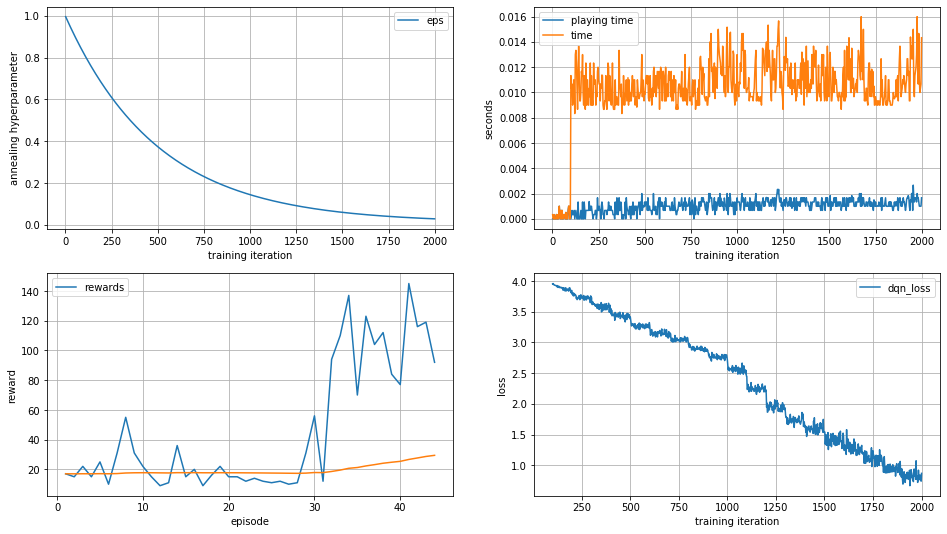

In [28]:
system.run(2000)

# Rainbow DQN
##### <u>CHANGES</u> (compared to Noisy N-step Dueling Double DQN with PrioritizedReplay) :
* Q_head is given as parameter representation **DuelingCategoricalQ(-10, 10, 51)** head.

In [29]:
agent = Composed(
    visualizer = Visualizer(),
    runner     = Runner(policy="policy"),
    latency    = NstepLatency(runner="runner"),
    replay     = ReplayBuffer(runner="latency"),
    sampler    = PrioritizedSampler(replay="replay"),
    corrected  = SamplerBiasCorrection(sampler="sampler"),
    updater    = PrioritiesUpdater(sampler="sampler", priority_provider="dqn_loss"),
    backbone   = Backbone(NoisyCartpoleNN()),
    q_head     = Q_head(backbone="backbone", headNetwork=NoisyLinear(), representation=DuelingCategoricalQ(-10,10,51)),
    dqn_loss   = DQN_loss(sampler="corrected", q_head="q_head", critic="target"),
    target     = Frozen(Q_head)(source="q_head"),
    trainer    = Trainer(backbone="backbone", losses=["dqn_loss"]),
    policy     = eGreedy(greedy_policy="q_head"),
)

In [30]:
system = System(agent, env)

Adding new head q_head to backbone:
  Input shape is (4,)
  Backbone feature size is 20
  Desired output is 153


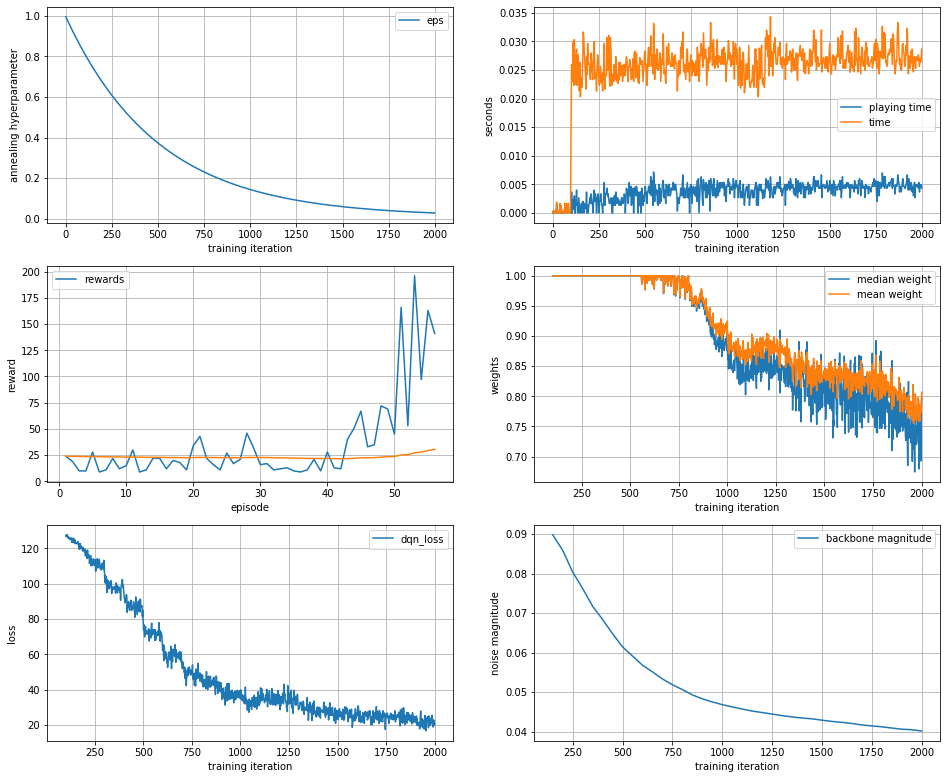

In [31]:
system.run(2000)

### All modules description:

In [32]:
agent

visualizer: Plots logs every 100 iteration
runner: Makes step in parallel environments each 1 iteration using policy policy
latency: Substitutes stream from runner to 3-step transitions
replay: Stores observations from latency
sampler: Each 1 iteration samples mini-batch from replay using priorities
corrected: Adds weights to mini-batches from sampler to correct bias
updater: Each 1 iteration updates priorities of sampler using priorities from dqn_loss
backbone: Backbone of network
q_head: Head, representing Q-function, connected to backbone
dqn_loss: Calculates DQN loss for q_head using target as target calculator and data from corrected
target: Copy of q_head, updated each 100 iteration
trainer: Trains backbone with all heads using following losses: dqn_loss
policy: Acts randomly with eps-probability, otherwise calls q_head